# Finding the temporal autocorrelation order and evidence of slope
This notebook fits an ARIMA model for ADPE at Royds data looking for evidence of change

In [52]:
# Load libraries
library(forecast); library(ggplot2);library(plyr); library(dplyr); library(fmsb); library(stats); library(lmtest); library(ggplot2); library(modelr); library(sjplot)

ERROR: Error in library(sjplot): there is no package called ‘sjplot’


In [77]:
# Load the data
master<-read.csv("~/Workspace/Anthropocene/data/MASTER_SIE.csv")

In [78]:
head(master)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,Salinity,ICEBERG,ADPE_BIRD,ADPE_CROZ,ADPE_RO,EMPE,WESE,WESE_1,av_SIE,SIC
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,34.845,0,38252,125441,34110,1108,0.6388527,NA,3.126,17.2
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,NA,0,47350,156441,36200,798,0.6505867,NA,3.269,31.0
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,34.790,0,41409,89489,23630,1201,0.6219035,1.05,2.983,37.2
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,34.835,1,26317,67114,13670,0,0.5084746,0.75,2.964,15.0
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,34.840,1,40678,161079,22390,247,0.5345502,0.80,2.779,44.9
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,34.836,1,22816,100843,19630,279,0.5084746,0.78,2.859,52.0


In [79]:
#calculating the annual percentage change for ADPE_RO
master_gr <- master %>% mutate(growth_ro=log(ADPE_RO/lag(ADPE_RO)))
master_gr$growth_ro<-ifelse(is.na(master_gr$growth_ro),0,master_gr$growth_ro)
master_gr[1,"growth_ro"]<-0.06



In [80]:
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6

In [95]:
#lag 5 years SIE
master_gr <- master_gr %>% mutate(SIE_lag5 = lag(av_SIE,5))
master_gr[5,"SIE_lag5"]<-2.703
master_gr[4,"SIE_lag5"]<-3.123
master_gr[3,"SIE_lag5"]<-2.731
master_gr[2,"SIE_lag5"]<-2.767
master_gr[1,"SIE_lag5"]<-2.60

#lag 4 years SIE
master_gr <- master_gr %>% mutate(SIE_lag4 = lag(av_SIE,4))
master_gr[4,"SIE_lag4"]<-2.703
master_gr[3,"SIE_lag4"]<-3.123
master_gr[2,"SIE_lag4"]<-2.731
master_gr[1,"SIE_lag4"]<-2.767


#lag 4 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag4 = lag(GyreSPD,4))
master_gr[4,"GyreSPD_lag4"]<-6.2
master_gr[3,"GyreSPD_lag4"]<-6.3
master_gr[2,"GyreSPD_lag4"]<-5.7
master_gr[1,"GyreSPD_lag4"]<-5.8

#lag 5 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag5 = lag(GyreSPD,5))
master_gr[5,"GyreSPD_lag5"]<-6.2
master_gr[4,"GyreSPD_lag5"]<-6.3
master_gr[3,"GyreSPD_lag5"]<-5.7
master_gr[2,"GyreSPD_lag5"]<-5.8
master_gr[1,"GyreSPD_lag5"]<-5.0

#lag 5 years Air Temp
master_gr <- master_gr %>% mutate(mnAirTemp_lag5 = lag(mnAirTemp,5))
master_gr[5,"mnAirTemp_lag5"]<--5.6
master_gr[4,"mnAirTemp_lag5"]<--4.5
master_gr[3,"mnAirTemp_lag5"]<--5.2
master_gr[2,"mnAirTemp_lag5"]<--7.7
master_gr[1,"mnAirTemp_lag5"]<--4.2

# VARIABLES WITHOUT DATA FOR THE LAGGED YEARS (before 1998)

master_gr <- master_gr %>% mutate(mnWind_lag = lag(mnWind,5))
master_gr <- master_gr %>% mutate(Salinity_lag = lag(Salinity,5))
master_gr <- master_gr %>% mutate(mnSST_lag = lag(nmSST_aw_RSP,5))
master_gr <- master_gr %>% mutate(Prop134_lag = lag(Prop._134,5))
master_gr <- master_gr %>% mutate(SIC_lag4 = lag(SIC,4))
master_gr[4,"SIC_lag4"]<-16.8
master_gr <- master_gr %>% mutate(SIC_lag1 = lag(SIC,1))

In [101]:
master_gr$SIC_lag1_2<- master_gr$SIC_lag1^2
master_gr$SIC_2<- master_gr$SIC^2
master_gr$SIC_lag4_2<- master_gr$SIC_lag4^2
master_gr$SIE_lag4_2<- master_gr$SIE_lag4^2
master_gr$SIE_lag5_2<- master_gr$SIE_lag5^2
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6
master_gr$mnOW_RSP6_2<-master_gr$mnOW_RSP6^2
master_gr$mnChl_aw_RSP_2<-master_gr$mnChl_aw_RSP^2
master_gr$nmSST_aw_RSP_2<-master_gr$nmSST_aw_RSP^2
master_gr$mnWind_2<-master_gr$mnWind^2
master_gr$GyreSPD_2<-master_gr$GyreSPD^2
master_gr$GyreSPD_lag4_2<-master_gr$GyreSPD_lag4^2
master_gr$GyreSPD_lag5_2<-master_gr$GyreSPD_lag5^2
master_gr$Salinity_2<-master_gr$Salinity^2
master_gr$intP_RSP_2<-master_gr$intP_RSP^2
master_gr$Prop._134_2<-master_gr$Prop._134^2
master_gr$TOTALTonnes.100_2<-master_gr$TOTALTonnes.100^2

In [83]:
head(master_gr)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,mnChl_aw_RSP_2,nmSST_aw_RSP_2,mnWind_2,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,1.3490529,0.4766494,60.8400,39.69,33.64,25.00,1214.174,396.36862,NA,0.16810
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,1.8307708,0.8130016,60.2176,44.89,32.49,33.64,NA,517.56392,NA,8.76160
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,1.2066512,0.8549573,73.9600,40.96,39.69,32.49,1210.344,211.45700,900,44.81499
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,2.1323025,1.2482029,77.4400,43.56,38.44,39.69,1213.477,553.75893,2500,32.31809
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,0.0971943,1.0962299,73.9600,19.36,39.69,38.44,1213.826,6.03002,3025,151.50163
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1.6336163,0.2987705,70.5600,49.00,44.89,39.69,1213.547,246.71613,1225,201.09225


In [9]:
head(master_gr)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,mnChl_aw_RSP_2,nmSST_aw_RSP_2,mnWind_2,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,1.3490529,0.4766494,60.8400,39.69,33.64,25.00,1214.174,396.36862,NA,0.16810
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,1.8307708,0.8130016,60.2176,44.89,32.49,33.64,NA,517.56392,NA,8.76160
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,1.2066512,0.8549573,73.9600,40.96,39.69,32.49,1210.344,211.45700,900,44.81499
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,2.1323025,1.2482029,77.4400,43.56,38.44,39.69,1213.477,553.75893,2500,32.31809
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,0.0971943,1.0962299,73.9600,19.36,39.69,38.44,1213.826,6.03002,3025,151.50163
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1.6336163,0.2987705,70.5600,49.00,44.89,39.69,1213.547,246.71613,1225,201.09225


In [10]:
#checking best model
mdl1<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=T)
summary(mdl1)

Series: master_gr$growth_ro 
ARIMA(1,0,0) with drift 

Coefficients:
          ar1   drift
      -0.2565  0.0012
s.e.   0.2007  0.0034

sigma^2 estimated as 0.07576:  log likelihood=-1.82
AIC=9.64   AICc=10.97   BIC=12.91

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set -0.01876454 0.2624388 0.1803076 Inf  Inf 0.5513948 -0.08880134


In [11]:
amdl<-auto.arima(master$ADPE_RO,seasonal=FALSE)
summary(amdl)

Series: master$ADPE_RO 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1       mean
      0.4782  26023.362
s.e.  0.2022   1641.572

sigma^2 estimated as 29507317:  log likelihood=-209.48
AIC=424.96   AICc=426.37   BIC=428.09

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -76.87152 5166.923 4272.985 -5.276483 19.04782 0.8720378
                    ACF1
Training set -0.02808023


In [12]:
summary(amdl)

Series: master$ADPE_RO 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1       mean
      0.4782  26023.362
s.e.  0.2022   1641.572

sigma^2 estimated as 29507317:  log likelihood=-209.48
AIC=424.96   AICc=426.37   BIC=428.09

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -76.87152 5166.923 4272.985 -5.276483 19.04782 0.8720378
                    ACF1
Training set -0.02808023


In [13]:
mdl1<-Arima(master$ADPE_RO,order=c(1,0,0),include.mean=F,include.drift=T)
summary(mdl1)

Series: master$ADPE_RO 
ARIMA(1,0,0) with drift 

Coefficients:
         ar1      drift
      0.9564   848.8891
s.e.  0.0720  1370.2730

sigma^2 estimated as 45589888:  log likelihood=-215.15
AIC=436.29   AICc=437.71   BIC=439.43

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set 201.2398 6422.46 5000.754 -3.715952 22.53848 1.020562 -0.1524426



	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with drift
Q* = 3.5204, df = 3, p-value = 0.3181

Model df: 2.   Total lags used: 5



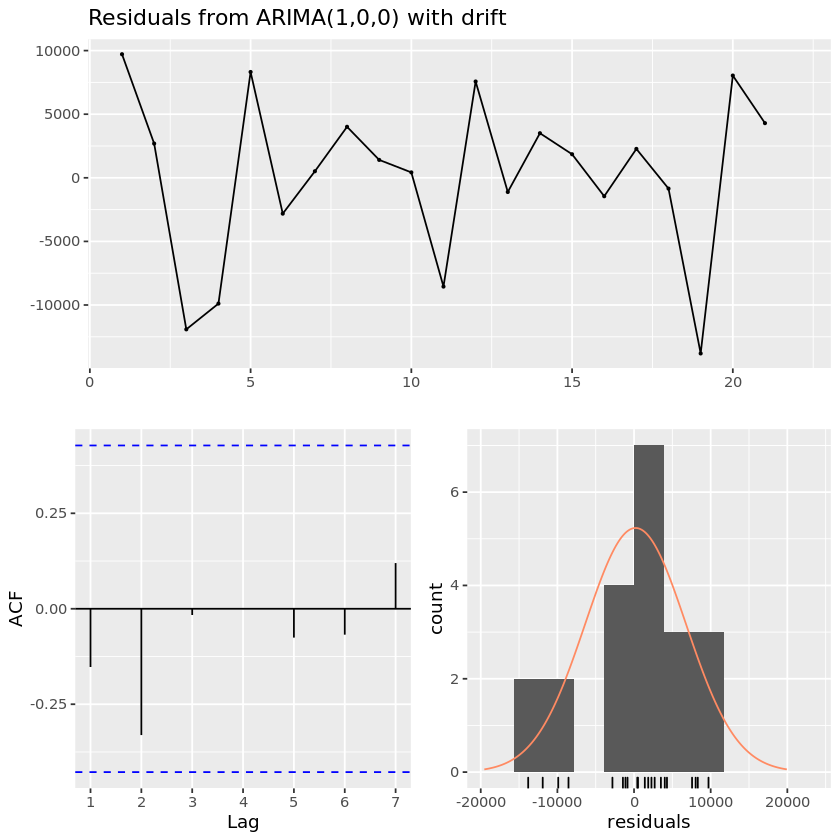

In [14]:
checkresiduals(mdl1)

In [15]:
mdl2<-Arima(master$ADPE_RO,order=c(2,0,0),include.mean=F,include.drift=T)
summary(mdl2)

Series: master$ADPE_RO 
ARIMA(2,0,0) with drift 

Coefficients:
         ar1     ar2      drift
      0.8147  0.1610   417.7725
s.e.  0.2201  0.2317  1328.8244

sigma^2 estimated as 46109728:  log likelihood=-214.93
AIC=437.85   AICc=440.35   BIC=442.03

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 210.0068 6286.702 4818.339 -3.969975 22.03377 0.9833344
                    ACF1
Training set -0.05416215



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with drift
Q* = 3.7421, df = 3, p-value = 0.2907

Model df: 3.   Total lags used: 6



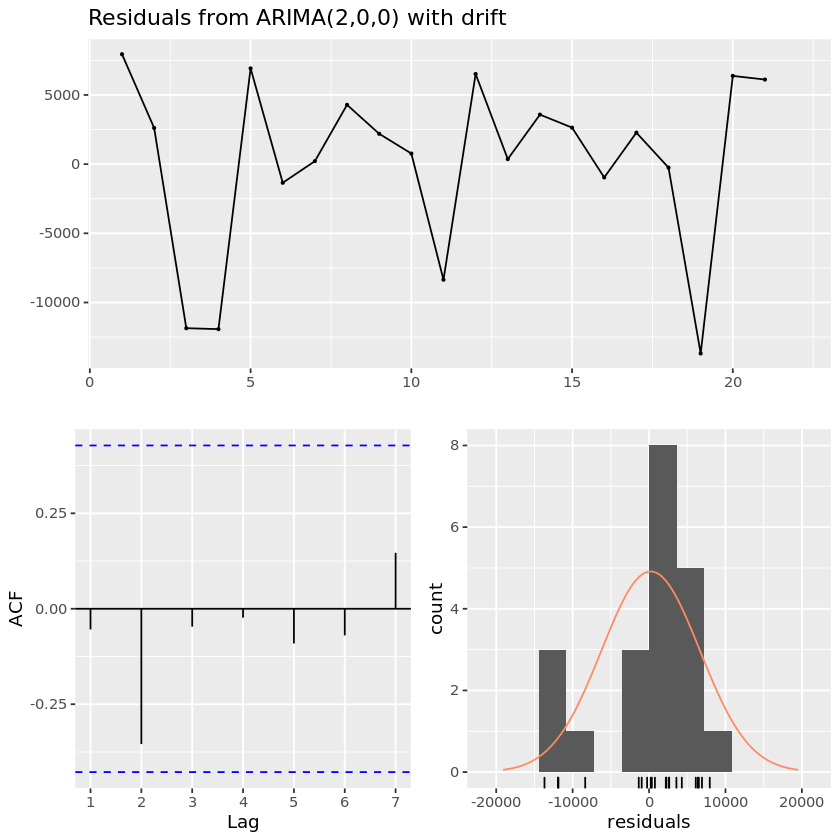

In [16]:
checkresiduals(mdl2)

In [17]:
mdl5<-Arima(master$ADPE_RO,order=c(2,0,1),include.mean=F,include.drift=T)
summary(mdl5)

Series: master$ADPE_RO 
ARIMA(2,0,1) with drift 

Coefficients:
         ar1     ar2     ma1      drift
      0.1792  0.7353  0.8125   899.7621
s.e.  0.7370  0.7205  0.6856  1372.8011

sigma^2 estimated as 50889161:  log likelihood=-215.11
AIC=440.22   AICc=444.22   BIC=445.45

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set 206.3955 6418.41 4981.364 -3.593018 22.44207 1.016605 -0.1795289


In [18]:
mdl3<-Arima(master$ADPE_RO,order=c(3,0,0),include.mean=F,include.drift=T)
summary(mdl3)

Series: master$ADPE_RO 
ARIMA(3,0,0) with drift 

Coefficients:
         ar1      ar2     ar3     drift
      0.7249  -0.1022  0.3647    5.3876
s.e.  0.2151   0.2771  0.2388  868.6088

sigma^2 estimated as 42930998:  log likelihood=-213.89
AIC=437.77   AICc=441.77   BIC=442.99

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 139.1397 5895.224 4774.814 -4.243446 21.93918 0.9744517
                     ACF1
Training set 0.0002818613


In [19]:
mdl4<-Arima(master$ADPE_RO,order=c(1,0,1),include.mean=F,include.drift=T)
summary(mdl4)

Series: master$ADPE_RO 
ARIMA(1,0,1) with drift 

Coefficients:
         ar1      ma1     drift
      0.9925  -0.4171   56.1557
s.e.  0.0154   0.3970  877.7548

sigma^2 estimated as 43729681:  log likelihood=-214.58
AIC=437.15   AICc=439.65   BIC=441.33

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 129.0571 6122.302 4685.825 -4.790151 21.67185 0.9562908 0.1017473



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with drift
Q* = 3.3486, df = 3, p-value = 0.3409

Model df: 3.   Total lags used: 6



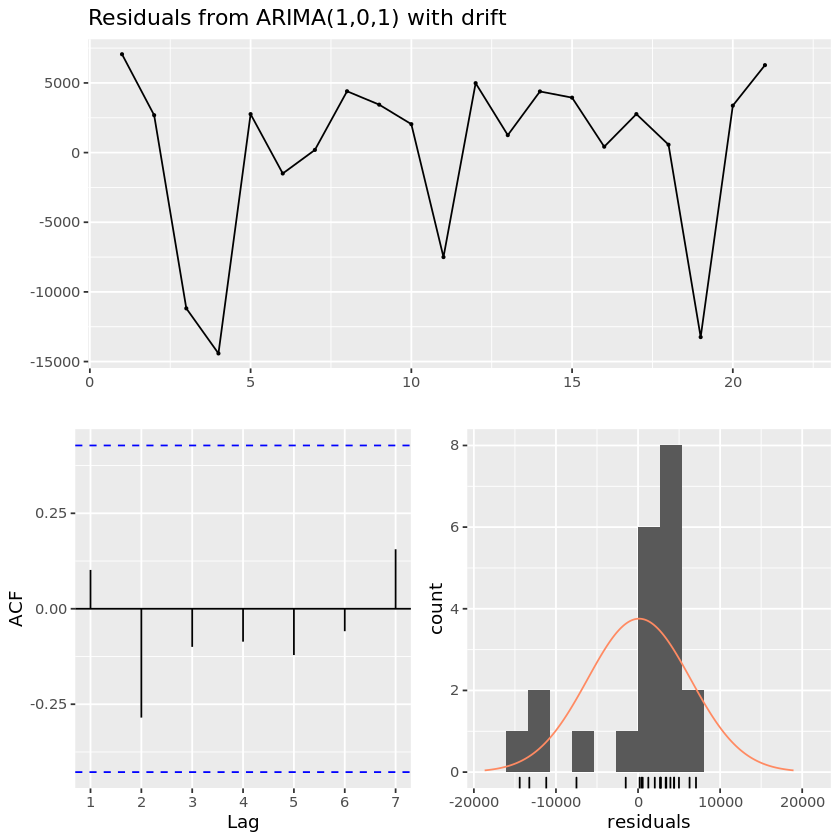

In [20]:
checkresiduals(mdl4)

In [21]:
#PLOTTING THE CORRECT TREND
adcroz<-master$ADPE_CROZ
names(adcroz)<-master$year

Warning message:
“Removed 1 rows containing missing values (geom_point).”


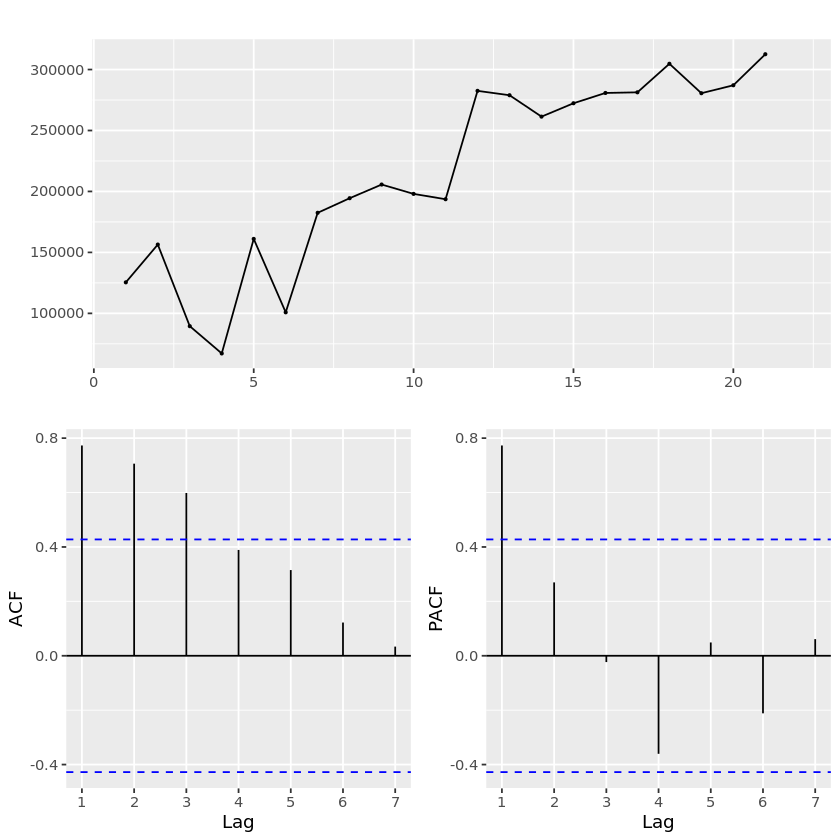

In [22]:
# Uncorrected trend
ggtsdisplay(adcroz)

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


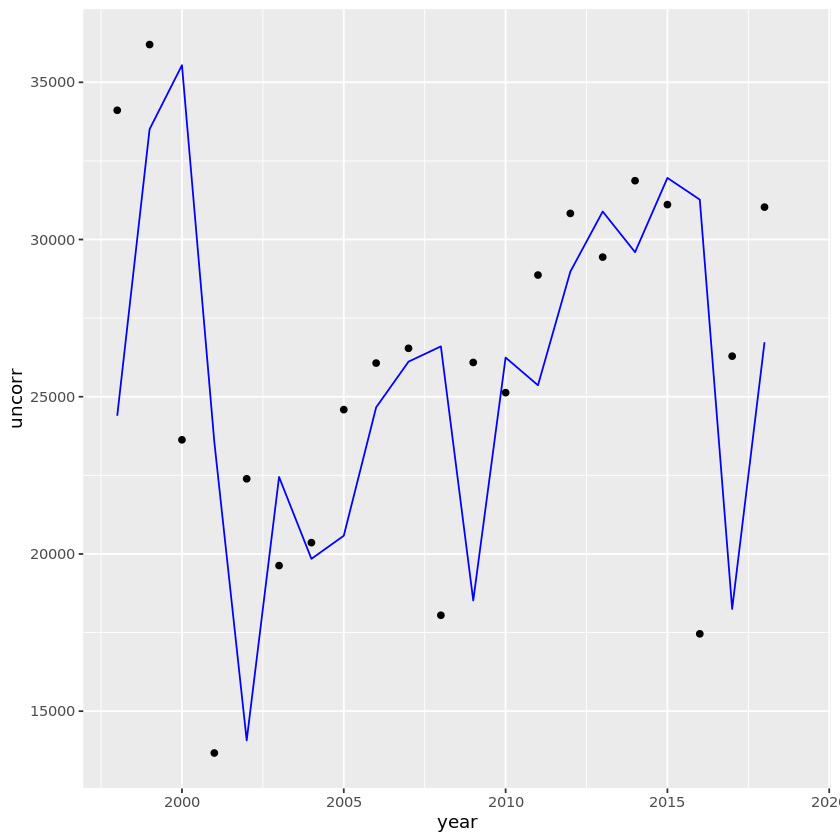

In [23]:
# Corrected trend
pdf<-data.frame(year=master$year,uncorr=mdl1$x,corr=fitted(mdl1))

ggplot(pdf,aes(x=year,y=uncorr)) + geom_point() + geom_line(aes(y=corr),color="blue")


Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


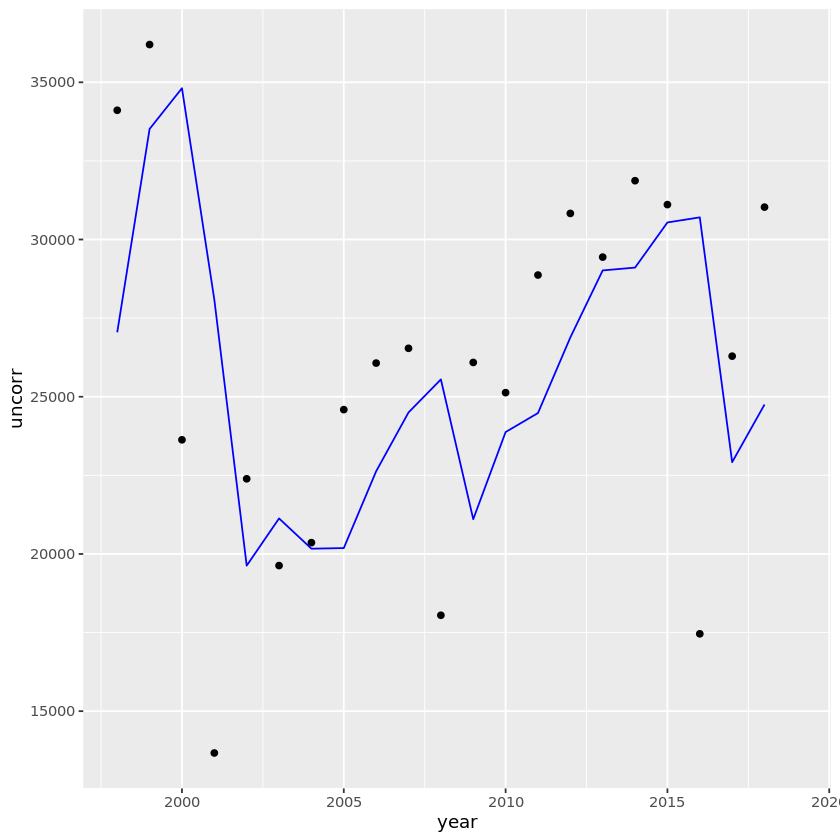

In [24]:
# Corrected trend
pdf<-data.frame(year=master$year,uncorr=mdl4$x,corr=fitted(mdl4))

ggplot(pdf,aes(x=year,y=uncorr)) + geom_point() + geom_line(aes(y=corr),color="blue")

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


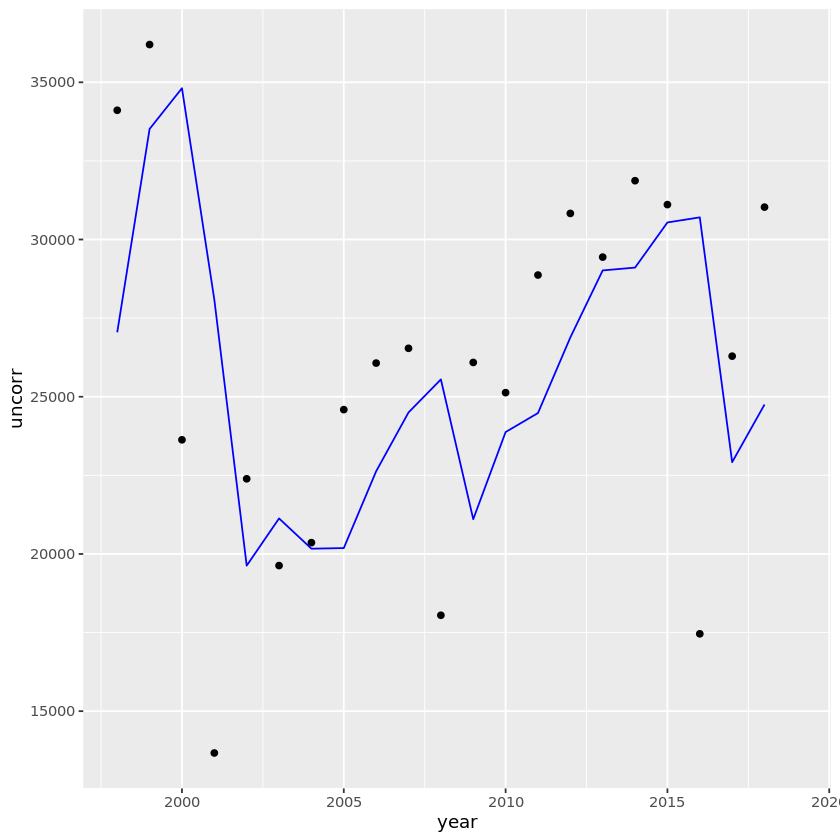

In [25]:
# Corrected trend
pdf<-data.frame(year=master$year,uncorr=mdl4$x,corr=fitted(mdl4))

ggplot(pdf,aes(x=year,y=uncorr)) + geom_point() + geom_line(aes(y=corr),color="blue")

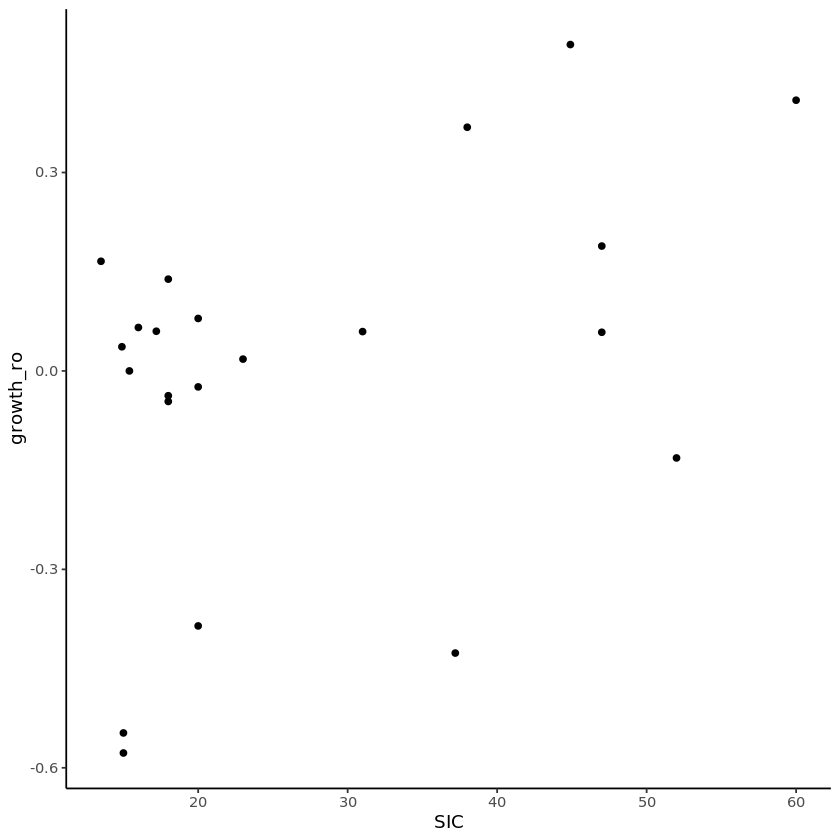

In [90]:
ggplot(master_gr,aes(x=SIC,y=growth_ro)) + geom_point()

In [26]:
cov_sat_growth<-as.matrix(master_gr[,c( "SIE_lag", "GyreSPD", "Salinity",
                                "Prop._134")])   #"mnChl_aw_RSP",, , "mnOW_RSP6", "mnWind", "intP_RSP"  , "mnAirTemp" , ""nmSST_aw_RSP"
mdlsat<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

ERROR: Error in `[.data.frame`(master_gr, , c("SIE_lag", "GyreSPD", "Salinity", : undefined columns selected


In [71]:
coeftest(mdlsat)


z test of coefficients:

            Estimate Std. Error z value Pr(>|z|)  
ar1       -0.1434896  0.3076833 -0.4664  0.64096  
SIE_lag    0.8606789  0.4699115  1.8316  0.06701 .
GyreSPD   -0.0187554  0.0784004 -0.2392  0.81093  
Salinity  -0.0760668  0.0490351 -1.5513  0.12084  
Prop._134  0.0043708  0.0069876  0.6255  0.53164  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Checking the model without the iceberg years

In [27]:
master_gr1 <-master_gr %>% filter(ICEBERG ==0)

In [28]:
head(master_gr1)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,mnChl_aw_RSP_2,nmSST_aw_RSP_2,mnWind_2,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,1.3490529,0.4766494,60.8400,39.69,33.64,25.00,1214.174,396.3686,NA,0.16810
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,1.8307708,0.8130016,60.2176,44.89,32.49,33.64,NA,517.5639,NA,8.76160
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,1.2066512,0.8549573,73.9600,40.96,39.69,32.49,1210.344,211.4570,900,44.81499
4,9,2006,19.54790,1.344420,188097,-1.006890,-6.000,9.40,2.738,5.4,⋯,1.8074651,1.0138275,88.3600,29.16,19.36,43.56,1211.040,382.1204,1764,729.69677
5,10,2007,12.77470,1.170400,241795,-0.846050,-6.800,8.20,3.126,4.9,⋯,1.3698362,0.7158006,67.2400,24.01,49.00,19.36,NA,163.1930,1681,814.42315
6,11,2008,14.98630,0.962226,227884,-0.983647,-5.025,9.20,3.167,7.4,⋯,0.9258789,0.9675614,84.6400,54.76,51.84,49.00,1212.432,224.5892,1764,500.72565


In [29]:
cov_sat_growth<-as.matrix(master_gr1[,c( "SIE_lag", "GyreSPD", 
                               "mnWind", "Prop._134")])   #"mnChl_aw_RSP", "Salinity", , "mnOW_RSP6",  "intP_RSP"  , "mnAirTemp" , ""nmSST_aw_RSP"
mdlsat<-Arima(master_gr1$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

ERROR: Error in `[.data.frame`(master_gr1, , c("SIE_lag", "GyreSPD", "mnWind", : undefined columns selected


In [30]:
coeftest(mdlsat)

ERROR: Error in coeftest(mdlsat): object 'mdlsat' not found


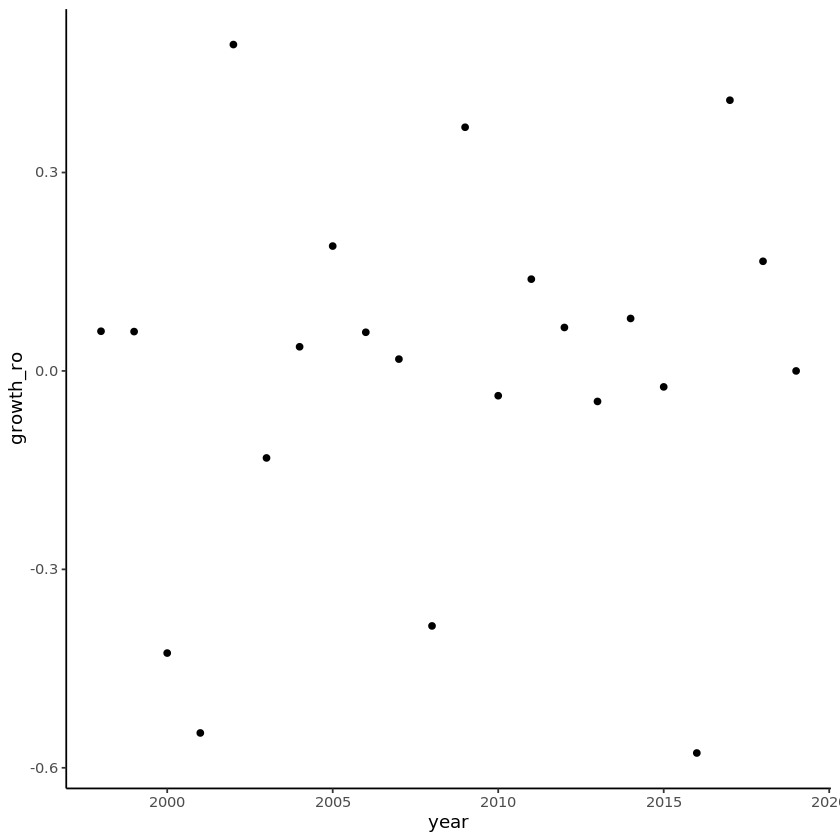

In [31]:

theme_set(theme_classic())
p1 <- ggplot(master_gr, aes(x=year, y=growth_ro)) + geom_point()  + scale_color_manual(values=c("#000000", "#E69F00"))

p1

Warning message:
“Removed 1 rows containing missing values (geom_point).”


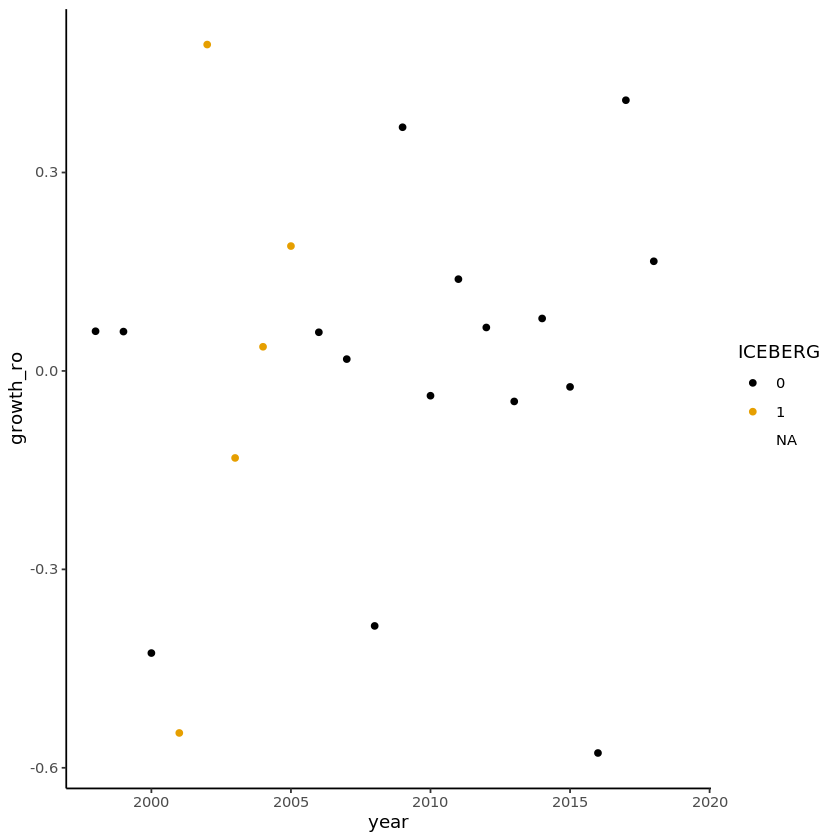

In [32]:
theme_set(theme_classic())
master_gr$ICEBERG <- factor(master_gr$ICEBERG)
p1 <- ggplot(master_gr, aes(x=year, y=growth_ro, color= ICEBERG, group= ICEBERG)) + geom_point()  + scale_color_manual(values=c("#000000", "#E69F00"))

p1

# Checking the best model for Crozier

In [84]:
mod<-as.matrix(master_gr[,c("SIC_lag4_2", "SIC_lag4", "GyreSPD", "GyreSPD_lag4", "Prop._134")])  
mod<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod)
summary(mod)

Series: master_gr$growth_ro 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIC_lag4_2  SIC_lag4  GyreSPD  GyreSPD_lag4  Prop._134
      -0.7612      -4e-04    0.0315  -0.0345       -0.0427     0.0011
s.e.   0.1823       3e-04    0.0145   0.0329        0.0368     0.0025

sigma^2 estimated as 0.06401:  log likelihood=2.51
AIC=8.98   AICc=21.43   BIC=14.81

Training set error measures:
                     ME    RMSE       MAE       MPE     MAPE      MASE
Training set -0.0148302 0.20351 0.1680557 -92.44304 218.9869 0.5139274
                   ACF1
Training set -0.2680432


In [85]:
coeftest(mod)


z test of coefficients:

                Estimate  Std. Error z value  Pr(>|z|)    
ar1          -0.76116475  0.18232476 -4.1748 2.983e-05 ***
SIC_lag4_2   -0.00043656  0.00029023 -1.5042    0.1325    
SIC_lag4      0.03147367  0.01452995  2.1661    0.0303 *  
GyreSPD      -0.03446000  0.03291177 -1.0470    0.2951    
GyreSPD_lag4 -0.04269126  0.03676453 -1.1612    0.2456    
Prop._134     0.00109969  0.00252608  0.4353    0.6633    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# including a lag5 (NOT FOR SIC)

In [46]:
mod1<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag5_2", "SIE_lag5", "GyreSPD", "GyreSPD_lag5", "Prop._134")])  
mod1<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod1)
summary(mod1)

Series: master_gr$growth_ro 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag5_2  SIE_lag5  GyreSPD  GyreSPD_lag5  Prop._134
      -0.3384  -0.5834     -0.1746    1.0615  -0.1282        0.1404    -0.0001
s.e.   0.2723   0.3136      0.1773    0.8446   0.0715        0.0846     0.0043

sigma^2 estimated as 0.09824:  log likelihood=-0.29
AIC=16.57   AICc=32.57   BIC=23.7

Training set error measures:
                       ME      RMSE       MAE     MPE     MAPE      MASE
Training set -0.004049076 0.2450253 0.1846655 127.969 178.1485 0.5647215
                     ACF1
Training set -0.006641249


In [36]:
coeftest(mdlsat)


z test of coefficients:

              Estimate Std. Error z value Pr(>|z|)
ar1          -0.263242   0.234431 -1.1229   0.2615
mnSIE        -0.155776   0.202905 -0.7677   0.4426
SIE_lag4      0.278313   0.191152  1.4560   0.1454
GyreSPD      -0.042933   0.056122 -0.7650   0.4443
GyreSPD_lag4 -0.015864   0.071761 -0.2211   0.8250


# Including WESE index

In [86]:
mod2<-as.matrix(master_gr[,c( "SIC", "SIC_lag4", "GyreSPD", "GyreSPD_lag5", "Prop._134", "WESE_1")])  
mod2<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod2)
summary(mod2)

Series: master_gr$growth_ro 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1     SIC  SIC_lag4  GyreSPD  GyreSPD_lag5  Prop._134   WESE_1
      -0.5508  0.0098    0.0038  -0.0446        0.0221    -0.0062  -0.0191
s.e.   0.2331  0.0038    0.0032   0.0466        0.0536     0.0037   0.1060

sigma^2 estimated as 0.05651:  log likelihood=4.63
AIC=6.74   AICc=24.74   BIC=13.4

Training set error measures:
                       ME     RMSE       MAE       MPE     MAPE      MASE
Training set -0.006953897 0.182322 0.1514278 -9.336242 155.6615 0.4630782
                   ACF1
Training set -0.0513502


In [87]:
coeftest(mod2)


z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)   
ar1          -0.5508451  0.2330543 -2.3636 0.018099 * 
SIC           0.0097991  0.0037544  2.6100 0.009053 **
SIC_lag4      0.0038413  0.0031775  1.2089 0.226691   
GyreSPD      -0.0445961  0.0466194 -0.9566 0.338769   
GyreSPD_lag5  0.0221090  0.0535995  0.4125 0.679983   
Prop._134    -0.0061710  0.0037150 -1.6611 0.096693 . 
WESE_1       -0.0190929  0.1060204 -0.1801 0.857084   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [88]:
mod3<-as.matrix(master_gr[,c( "SIC", "SIC_lag4", "GyreSPD", "GyreSPD_lag5", "Prop._134", "WESE")])  
mod3<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod3)
summary(mod3) 

Series: master_gr$growth_ro 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1     SIC  SIC_lag4  GyreSPD  GyreSPD_lag5  Prop._134    WESE
      -0.8176  0.0086   -0.0017  -0.0423        0.0754    -0.0107  0.0836
s.e.   0.1469  0.0024    0.0022   0.0370        0.0525     0.0032  0.1306

sigma^2 estimated as 0.03057:  log likelihood=8.22
AIC=-0.44   AICc=17.56   BIC=6.23

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE     MASE
Training set -0.01687164 0.1236314 0.1045438 -12.34553 118.8446 0.319703
                   ACF1
Training set -0.3872191


In [89]:
coeftest(mod3)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.8176398  0.1469486 -5.5641 2.635e-08 ***
SIC           0.0086348  0.0023950  3.6054 0.0003117 ***
SIC_lag4     -0.0017017  0.0022390 -0.7600 0.4472383    
GyreSPD      -0.0423195  0.0369895 -1.1441 0.2525839    
GyreSPD_lag5  0.0754131  0.0524828  1.4369 0.1507433    
Prop._134    -0.0107439  0.0031747 -3.3842 0.0007138 ***
WESE          0.0836194  0.1305915  0.6403 0.5219693    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [91]:
#taking out some no-significant variables
mod4<-as.matrix(master_gr[,c( "SIC", "SIC_lag4", "GyreSPD", "GyreSPD_lag5", "Prop._134")])  # "WESE"
mod4<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod4)
summary(mod4) 

Series: master_gr$growth_ro 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1     SIC  SIC_lag4  GyreSPD  GyreSPD_lag5  Prop._134
      -0.5386  0.0099    0.0037  -0.0458        0.0189    -0.0059
s.e.   0.2251  0.0037    0.0031   0.0464        0.0507     0.0034

sigma^2 estimated as 0.05153:  log likelihood=4.61
AIC=4.77   AICc=17.21   BIC=10.6

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.007236263 0.1825959 0.1516022 -9.081915 154.4955 0.4636112
                    ACF1
Training set -0.04760475


In [92]:
coeftest(mod4)



z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)   
ar1          -0.5385670  0.2250903 -2.3927 0.016726 * 
SIC           0.0098893  0.0037095  2.6659 0.007678 **
SIC_lag4      0.0037295  0.0031364  1.1891 0.234398   
GyreSPD      -0.0458186  0.0463601 -0.9883 0.322996   
GyreSPD_lag5  0.0189110  0.0507313  0.3728 0.709321   
Prop._134    -0.0059174  0.0034372 -1.7216 0.085142 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [96]:
#taking out some no-significant variables
mod6<-as.matrix(master_gr[,c( "SIC", "SIC_lag1", "GyreSPD",  "Prop._134")])  # "WESE" ""GyreSPD_lag5"
mod6<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod6)
summary(mod6) 

Series: master_gr$growth_ro 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1     SIC  SIC_lag1  GyreSPD  Prop._134
      -0.1772  0.0104   -0.0040  -0.0204    -0.0023
s.e.   0.2774  0.0043    0.0048   0.0252     0.0053

sigma^2 estimated as 0.07955:  log likelihood=0.15
AIC=11.69   AICc=19.33   BIC=17.03

Training set error measures:
                       ME      RMSE     MAE      MPE     MAPE      MASE
Training set 0.0004493921 0.2396943 0.19771 114.5961 204.8127 0.6046125
                   ACF1
Training set 0.03544132


In [97]:
coeftest(mod6)


z test of coefficients:

            Estimate Std. Error z value Pr(>|z|)  
ar1       -0.1771939  0.2774485 -0.6387  0.52305  
SIC        0.0104271  0.0043067  2.4211  0.01547 *
SIC_lag1  -0.0040277  0.0048066 -0.8379  0.40206  
GyreSPD   -0.0203926  0.0252095 -0.8089  0.41856  
Prop._134 -0.0023408  0.0053089 -0.4409  0.65927  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [102]:
#taking out some no-significant variables
mod6<-as.matrix(master_gr[,c( "SIC", "SIC_lag1", "SIC_lag1_2", "GyreSPD",  "Prop._134")])  # "WESE" ""GyreSPD_lag5"
mod6<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod6)
summary(mod6) 

Series: master_gr$growth_ro 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1     SIC  SIC_lag1  SIC_lag1_2  GyreSPD  Prop._134
      -0.1699  0.0096   -0.0326       4e-04   0.0295    -0.0003
s.e.   0.3167  0.0045    0.0256       5e-04   0.0488     0.0058

sigma^2 estimated as 0.08005:  log likelihood=0.82
AIC=12.36   AICc=23.56   BIC=18.59

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.006725495 0.2310051 0.2001322 95.21703 213.2073 0.6120199
                   ACF1
Training set 0.02580712


In [103]:
coeftest(mod6)


z test of coefficients:

              Estimate  Std. Error z value Pr(>|z|)  
ar1        -0.16994227  0.31667415 -0.5366  0.59151  
SIC         0.00960148  0.00448134  2.1425  0.03215 *
SIC_lag1   -0.03255223  0.02564468 -1.2694  0.20431  
SIC_lag1_2  0.00044807  0.00045656  0.9814  0.32640  
GyreSPD     0.02951224  0.04878436  0.6050  0.54521  
Prop._134  -0.00029375  0.00577145 -0.0509  0.95941  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [99]:
#taking out some no-significant variables
mod6<-as.matrix(master_gr[,c( "SIC", "SIC_2", "GyreSPD",  "Prop._134")])  # "WESE" ""GyreSPD_lag5"
mod6<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod6)
summary(mod6)

Series: master_gr$growth_ro 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1     SIC   SIC_2  GyreSPD  Prop._134
      -0.2129  0.0188  -1e-04  -0.0392    -0.0054
s.e.   0.3065  0.0207   4e-04   0.0393     0.0065

sigma^2 estimated as 0.08175:  log likelihood=-0.1
AIC=12.2   AICc=19.83   BIC=17.54

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.00384861 0.2429812 0.2029267 73.69168 164.3548 0.6205658
                   ACF1
Training set 0.03596334


In [100]:
coeftest(mod6)


z test of coefficients:

             Estimate  Std. Error z value Pr(>|z|)
ar1       -0.21287547  0.30649924 -0.6945   0.4873
SIC        0.01877508  0.02073079  0.9057   0.3651
SIC_2     -0.00011651  0.00044799 -0.2601   0.7948
GyreSPD   -0.03920437  0.03926752 -0.9984   0.3181
Prop._134 -0.00544033  0.00650935 -0.8358   0.4033


In [70]:
mod4<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag5", "GyreSPD", "GyreSPD_lag5", "Prop._134")])  
mod4<-Arima(master_gr$growth_ro,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod4)
summary(mod4) #LOWEST AIC MODEL

Series: master_gr$growth_ro 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag5  GyreSPD  GyreSPD_lag5  Prop._134
      -0.4345  -0.3747    0.2592  -0.1025        0.1432     0.0015
s.e.   0.2242   0.2352    0.2293   0.0685        0.0845     0.0038

sigma^2 estimated as 0.09493:  log likelihood=-0.8
AIC=15.61   AICc=26.81   BIC=21.84

Training set error measures:
                       ME      RMSE       MAE     MPE    MAPE      MASE
Training set -0.002513948 0.2515644 0.1939796 124.185 196.812 0.5932049
                    ACF1
Training set -0.04313667


In [71]:
coeftest(mod4)


z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)  
ar1          -0.4345018  0.2242347 -1.9377  0.05266 .
mnSIE        -0.3747366  0.2351778 -1.5934  0.11107  
SIE_lag5      0.2592367  0.2293003  1.1306  0.25824  
GyreSPD      -0.1024782  0.0685496 -1.4950  0.13493  
GyreSPD_lag5  0.1432485  0.0844746  1.6958  0.08993 .
Prop._134     0.0015300  0.0038293  0.3995  0.68949  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# # Gyre lag 5 and  SIE are significant. 
# I think results makes sense: if Skua predation is driving the population annual growth, environmental variables would lose significance. Still Gyre lag 5 is significant, so it can be quite important driving population annual growth in addition to Skua predation.
# On other hand, it makes sense that the lag is longer for Royds than for Crozier, as the age of first breeding is higher at Royds. Birds at Royds tend to breed around one year later than birds at Crozier according our last analyses.

In [54]:
#plot
x <- seq(10, 60, 5)

In [61]:
y <- predict(mod3, list(Prop._134 = x),type="response", newxreg = NULL)

ERROR: Error in predict.Arima(mod3, list(Prop._134 = x), type = "response", newxreg = NULL): 'xreg' and 'newxreg' have different numbers of columns


ERROR: Error in xy.coords(x, y): object 'y' not found


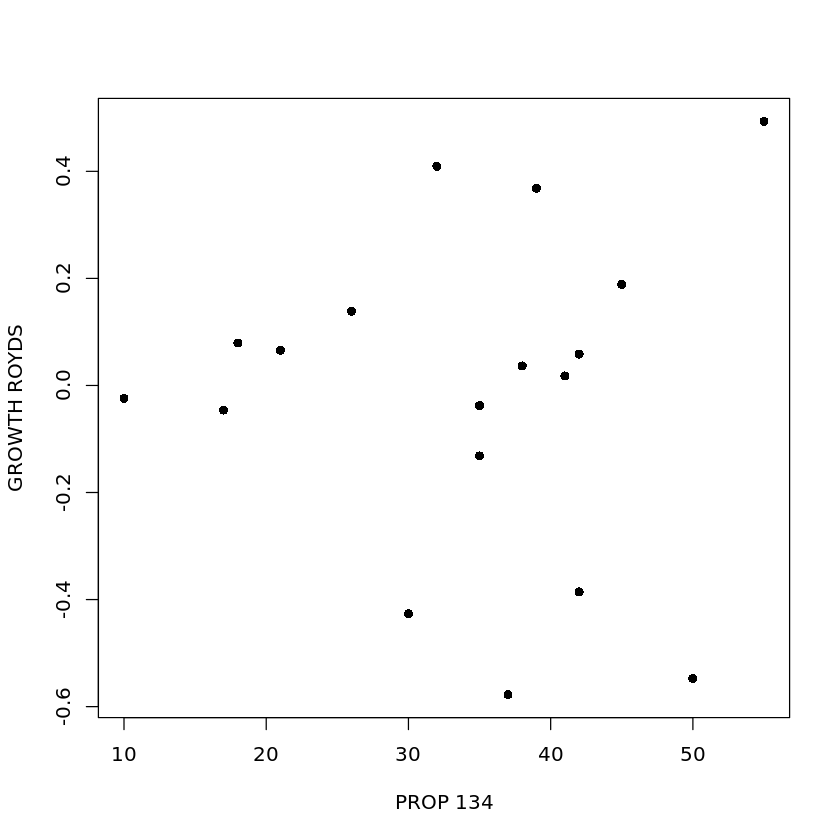

In [62]:
plot(master_gr$Prop._134, master_gr$growth_ro, pch = 16, xlab = "PROP 134", ylab = "GROWTH ROYDS")
lines(x, y)